In [2]:
from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib
import matplotlib.pyplot as plt # for plot
import random
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

## Yesterday's Coin example

In [3]:
# here we're discretizing the heads probability p
p = np.linspace(0, 1, 101)

In [4]:
p

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [5]:
p_priors = { k:1/101 for k in p}

In [7]:
#p_priors

In [8]:
def coin_likelihood(data, p):
    # what is the likelihood of drawing data
    # given that the heads probability is p
    # data = 0 for tails, 1 for heads
    if data:
        return p
    return 1-p

In [9]:
bool(1)

True

In [10]:
bool(0)

False

Now create an instance of that same `Bayes` object from yesterday's sprint

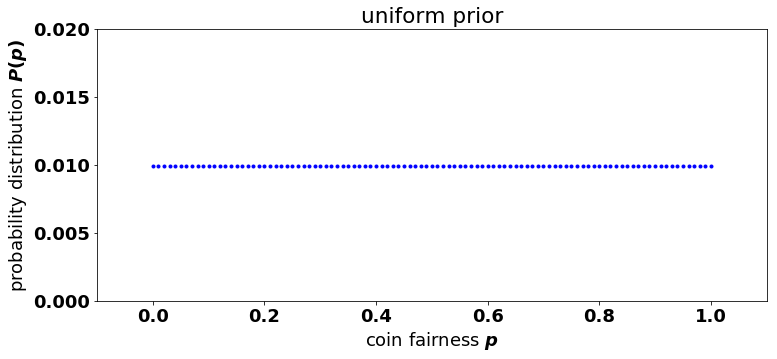

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
bayes = Bayes(p_priors.copy(), coin_likelihood)
bayes.plot(title="uniform prior", color='b', marker='.', linestyle='')
ax.set_ylim([0,0.02])
ax.set_xlim([-0.1,1.1])
ax.set_xlabel('coin fairness $p$')
ax.set_ylabel('probability distribution $P(p)$');

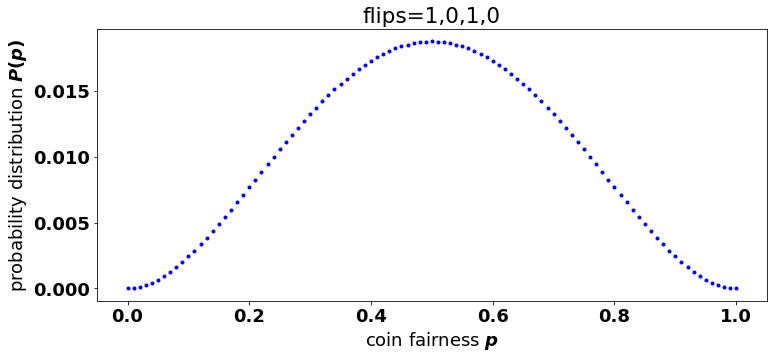

In [12]:
bayes.update(1) 
bayes.update(0) 
bayes.update(1)
bayes.update(0)

fig, ax = plt.subplots(figsize=(12,5))

bayes.plot(title="flips=1,0,1,0", color='b', marker='.', linestyle='')
plt.xlabel('coin fairness $p$')
plt.ylabel('probability distribution $P(p)$');

Let's create a function to do that nicely...

In [13]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs, color='b', marker='.', linestyle='')
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('$P(p)$')
        ax.set_xlabel('$p$')

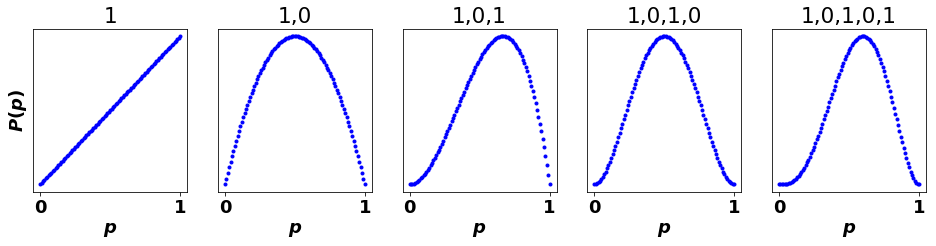

In [14]:
flips_A = [1,0,1,0,1]

bayesA = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesA, flips_A)

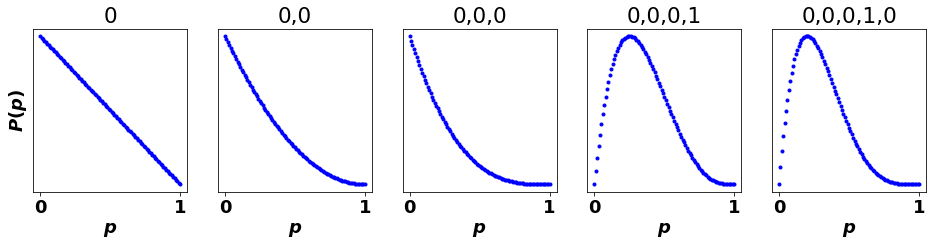

In [15]:
flips_B = [0,0,0,1,0]

bayesB = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesB, flips_B)